In [3]:
import pandas as pd
import numpy as np
import sklearn
from xgboost import XGBClassifier
import xgboost
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate,GridSearchCV

import pickle
from sklearn.utils import shuffle
import json
import os
from xgboost import XGBClassifier
from matplotlib import pyplot
import matplotlib.pylab as plt
%matplotlib inline
import math

In [4]:
#Don't use datetime, Don't use categorical features, xgboost doesn't do those, first one hot encode
featuresToUse = ['visitor_hist_starrating', 'visitor_hist_adr_usd',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'comp1_rate', 'comp1_inv',
                 'mean_prop_starrating',
       'mean_prop_review_score', 'mean_prop_brand_bool',
       'mean_prop_location_score1', 'mean_prop_location_score2',   'mean_prop_log_historical_price','cluster__0','cluster__1','cluster__2','cluster__3','cluster__4','cluster__5','diff_distance_orig','diff_price_usd']
labelToPredict = 'booking_bool'
neededVars = ['srch_id','click_bool']
nameOfModel = "models/10mayClickingOverFitTest"

In [2]:
#Don't use datetime, Don't use categorical features, xgboost doesn't do those, first one hot encode
featuresToUse = ['visitor_hist_starrating', 'visitor_hist_adr_usd',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'comp1_rate', 'comp1_inv',
       'diff_distance_orig','diff_price_usd']
labelToPredict = 'click_bool'
neededVars = ['srch_id','booking_bool']
nameOfModel = "models/10mayClickingOverFitTest2"

In [8]:
dftrain = pd.read_csv('../data/80PercentTrainWithMeanNoShuffle.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)

In [9]:
df = pd.read_csv('../data/20PercentTestWithMeanNoShuffle.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
Y = df[labelToPredict]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)
xgmat_test = xgboost.DMatrix( df, label=Y)

C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [12]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}



gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate = 0.1, n_estimators=120, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'reg:logistic', nthread=-1, scale_pos_weight=sum(Y==0)/sum(Y==1), seed=12), 
param_grid = param_test1, scoring='roc_auc',n_jobs=1,iid=False, cv=5,verbose =2)

gsearch1.fit(dftrain[featuresToUse],dftrain[labelToPredict])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=3, min_child_weight=1 .................................
[CV] .................. max_depth=3, min_child_weight=1, total= 3.8min
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV] .................. max_depth=3, min_child_weight=1, total= 3.8min
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .................. max_depth=3, min_child_weight=1, total= 3.7min
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .................. max_depth=3, min_child_weight=1, total= 3.7min
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .................. max_depth=3, min_child_weight=1, total= 4.0min
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=3, total= 4.3min
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=3, total= 4.3min
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=3, total= 4.3min
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .

[CV] .................. max_depth=9, min_child_weight=5, total=11.8min


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 483.3min finished


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [14]:
gsearch1.cv_results_

C:\Users\Rens\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rens\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rens\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Rens\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([225.56983967, 255.21629782, 257.57668581, 387.59580064,
        389.38441315, 390.01692839, 539.73805776, 539.98241067,
        539.52982035, 697.71772671, 695.29160032, 697.29982581]),
 'std_fit_time': array([5.25316262, 0.89866657, 1.37081344, 1.41723442, 1.65355861,
        3.07007728, 3.95947194, 3.43512732, 1.50952291, 4.73081391,
        2.83116214, 5.64930892]),
 'mean_score_time': array([1.87859769, 2.18316331, 2.19535475, 2.62139888, 2.69062471,
        2.71096969, 3.23377295, 3.21600866, 3.22898507, 4.03182831,
        3.90218635, 3.93290329]),
 'std_score_time': array([0.15685276, 0.01715887, 0.01483728, 0.02048638, 0.08910174,
        0.08331459, 0.0836278 , 0.02649077, 0.03239451, 0.28624974,
        0.12028085, 0.12103658]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
 

Lets train it on clicking

In [ ]:
# construct xgboost.DMatrix from numpy array, treat -999.0 as missing value
#xgmat = xgboost.DMatrix( df, label=y_train)

# setup parameters for xgboost
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'reg:logistic'
# scale weight of positive examples
param['scale_pos_weight'] = sum(Y==0)/sum(Y==1)
param['eta'] = 0.1
param['max_depth'] = 6
param['eval_metric'] = 'auc'
param['silent'] = 0
param['eval_set'] = xgmat_test
#param['colsample_bytree'] = 0.8


# you can directly throw param in, though we want to watch multiple metrics here
plst = list(param.items())

watchlist = [ (xgmat,'train') ,(xgmat_test,'test')]

num_round = 500
print ('loading data end, start to boost trees')
bst = xgboost.train( plst, xgmat, num_round, watchlist ,early_stopping_rounds=15);
# save out model
bst.save_model(nameOfModel+".model")

print ('finish training')


loading data end, start to boost trees
[0]	train-auc:0.696552	test-auc:0.696907
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 15 rounds.
[1]	train-auc:0.700899	test-auc:0.700484
[2]	train-auc:0.703936	test-auc:0.702941
[3]	train-auc:0.706451	test-auc:0.705048
[4]	train-auc:0.708164	test-auc:0.706813
[5]	train-auc:0.709249	test-auc:0.707682
[6]	train-auc:0.710661	test-auc:0.708899


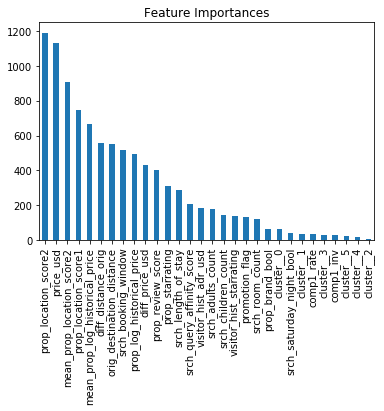

In [23]:
feat_imp = pd.Series(bst.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')


In [17]:
y_pred = bst.predict(xgmat_test)

In [18]:
predictions = [round(value) for value in y_pred]
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred'] = y_pred

In [19]:
def getLog(x):
    return math.log(x+1,2)
def getScore(df):
    df['rank_srch_id'] = df.groupby('srch_id').cumcount().add(1)
    
    df['gain'] = 5*df['booking_bool']
    df['gain'] = np.where(df['gain'] == 0, df['click_bool'], df['gain'])
    df['log_rank'] = df['rank_srch_id'].apply(getLog)
    
    df['g/rank'] = df['gain']/df['log_rank']
    gi_sum = df['g/rank'].sum()

    df['gain_sorted'] = list(df[['srch_id', 'booking_bool', 'click_bool', 'gain']].sort_values(by = ['srch_id','booking_bool','click_bool'], ascending = [True, False, False])['gain'])
    df['g/rank_sorted'] = df['gain_sorted']/df['log_rank']
    gi_sorted_sum = df['g/rank_sorted'].sum()
    
    score = gi_sum/gi_sorted_sum

    return score, gi_sum, gi_sorted_sum

In [22]:
score, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred'], ascending = [True, False]).reset_index(drop=True))
print(score)

# evaluate predictions
accuracy = accuracy_score(df['click_bool'], predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.5089782169943571
Accuracy: 68.85%


In [21]:
f=open("scores.txt", "a+")
f.write("Score: "+str(score)+"\n")
f.write("Label to predict: "+str(labelToPredict)+"\n")
f.write("Features used:\n")
f.write(str(list(featuresToUse)) +"\n")
f.write("Parameters xgboost:\n")
f.write(str(json.dumps(param))+"\n")
f.write("Number of rounds:\n"+str(num_round)+"\n")
f.close()

TypeError: Object of type 'DMatrix' is not JSON serializable

In [24]:
os.rename(nameOfModel+".model",nameOfModel+str(int(score*100))+".model")
newNameOfModel = nameOfModel+str(int(score*100))

Lets combine the models

In [3]:
clickingModel = xgboost.Booster()
clickingModel.load_model('models/10mayClicking50074.model')
bookingModel = xgboost.Booster()
bookingModel.load_model("models/9mayBooking74.model")

In [4]:
df = pd.read_csv('../data/20PercentTestWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

In [5]:
xgmat_test = xgboost.DMatrix( df)
y_pred_clicking = clickingModel.predict(xgmat_test)
y_pred_booking = bookingModel.predict(xgmat_test)

In [6]:
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred_clicking'] = y_pred_clicking
df['y_pred_booking'] = y_pred_booking
df['combined'] = y_pred_booking+y_pred_clicking

In [9]:
score_apart, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred_booking', 'y_pred_clicking'], ascending = [True, False,False]).reset_index(drop=True))
score_combined, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'combined'], ascending = [True, False]).reset_index(drop=True))
print("Sort first on booking and then on clicking: "+str(score_apart))
print("Combine then sort: "+str(score_combined))

Sort first on booking and then on clicking: 0.7482338410691464
Combine then sort: 0.7518651972072667


Evaluation

In [3]:
dfTest = pd.read_csv("../data/testWithMean.csv")

In [4]:
clickingModel = xgboost.Booster()
clickingModel.load_model("models/10mayClickingOverFitTest50.model")
#bookingModel = xgboost.Booster()
#bookingModel.load_model("models/9mayBooking74.model")

In [5]:
xgmat_test_submission = xgboost.DMatrix(dfTest[featuresToUse])
y_pred_clicking = clickingModel.predict(xgmat_test_submission)
#_pred_booking = bookingModel.predict(xgmat_test_submission)
dfTest['predictedPos'] = y_pred_clicking#+y_pred_booking
dfTest = dfTest.sort_values(['srch_id','predictedPos'],ascending=[True, False])
dfSubmission = dfTest[['srch_id','prop_id']]
dfSubmission.to_csv("submissionTest10yFinal.csv",index=False)